In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train_data_raw1 = pd.read_csv("./train_data.csv")
train_data_raw1

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
train_data_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
submit = pd.read_csv("./Label_Encoded/lg.csv")

In [5]:
test_raw = pd.read_csv("./test_data.csv")
test_raw

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [6]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [7]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit_transform(train_data_raw1.Stay)
submit.Stay = lb.inverse_transform(submit.Stay)

In [8]:
submit

,case_id,Stay
0,318439,11-20
1,318440,51-60
2,318441,0-10
3,318442,11-20
4,318443,31-40
...,...,...
137052,455491,11-20
137053,455492,11-20
137054,455493,11-20
137055,455494,11-20


In [9]:
submit.to_csv("Smote_cat.csv",index=False)

(array([8.1621e+04, 1.3520e+04, 0.0000e+00, 7.7600e+03, 0.0000e+00,
        1.5456e+04, 1.7309e+04, 0.0000e+00, 1.3490e+03, 4.2000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

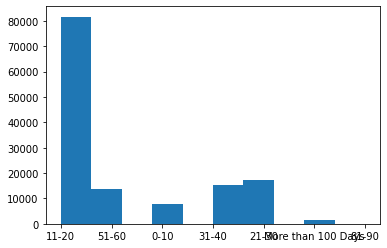

In [10]:
plt.hist(submit.Stay)

#### Ta có

In [11]:
test_raw.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [12]:
train_data_raw1.fillna(value=np.nan,inplace=True)

In [13]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
si.fit(train_data_raw1[['Bed Grade','City_Code_Patient']])
bg = si.transform(test_raw[['Bed Grade','City_Code_Patient']])
bg

array([[ 2.,  2.],
       [ 2.,  2.],
       [ 4.,  2.],
       ...,
       [ 4., 12.],
       [ 4., 10.],
       [ 4.,  3.]])

In [14]:
test_raw['Bed Grade'] = bg[:,0]
test_raw['City_Code_Patient'] = bg[:,1]

In [15]:
test_raw

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [16]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137057 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [17]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
train_data_raw1.Stay = lb.fit_transform(train_data_raw1.Stay)
train_data_raw1.Stay

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int32

(array([23604., 78139., 87491., 55159., 11743., 35018.,  2744., 10254.,
         4838.,  9448.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

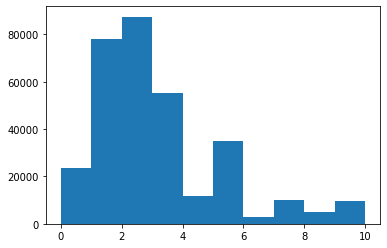

In [18]:
plt.hist(train_data_raw1.Stay)

#### Ta thấy sự phân bố

<AxesSubplot:xlabel='Stay', ylabel='Density'>

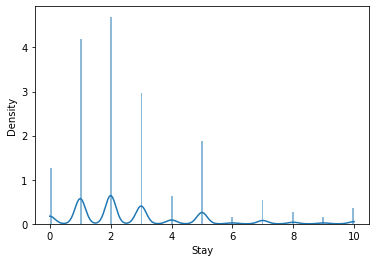

In [19]:
sns.histplot(train_data_raw1.Stay,kde=True, stat="density", linewidth=0)

#### Ta thấy 

<AxesSubplot:xlabel='Stay', ylabel='Density'>

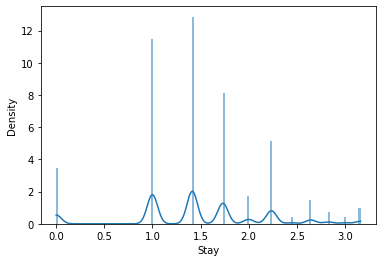

In [20]:
sns.histplot(np.sqrt(train_data_raw1.Stay),kde=True, stat="density", linewidth=0)

#### Ta thấy được sự phân bố của dữ liệu

In [21]:
train_data_raw1.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [22]:
# type(col)
for i in train_data_raw1.columns:
    print(i, end=' ')
    print(train_data_raw1[i].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [23]:
cat =  ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']
print(len(cat))
train_data_raw1[cat]

16


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,3,41-50,4144.0,1
318434,24,a,1,X,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81-90,6699.0,3
318435,7,a,4,X,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80,4235.0,1
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20,3761.0,1


<AxesSubplot:xlabel='Hospital_code', ylabel='count'>

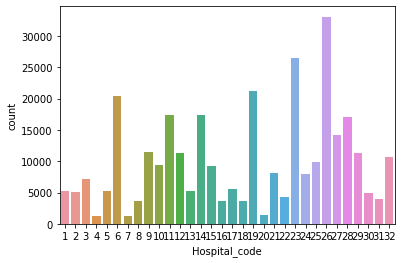

In [24]:
sns.countplot(data = train_data_raw1[cat] , x = 'Hospital_code',)

#### Ta thấy

<AxesSubplot:xlabel='Hospital_code', ylabel='Stay'>

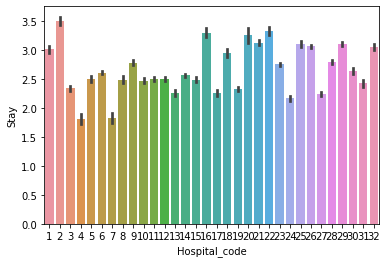

In [25]:
sns.barplot(x= "Hospital_code",y= "Stay", data = train_data_raw1)

#### Ta thấy

In [26]:
gfmlasl = train_data_raw1[train_data_raw1['Hospital_code'] == 26].groupby('Stay')
gfmlasl.get_group(1)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
11,12,26,b,2,Y,4,radiotherapy,R,D,1.0,31397,7.0,Urgent,Extreme,2,51-60,5993.0,1
26,27,26,b,2,Y,4,anesthesia,Q,D,3.0,8088,2.0,Trauma,Moderate,2,31-40,5164.0,1
107,108,26,b,2,Y,2,TB & Chest disease,S,D,2.0,48585,8.0,Urgent,Moderate,2,61-70,5448.0,1
156,157,26,b,2,Y,3,anesthesia,S,D,3.0,117626,8.0,Trauma,Moderate,2,21-30,5201.0,1
163,164,26,b,2,Y,4,gynecology,Q,D,1.0,42152,9.0,Emergency,Extreme,4,31-40,3676.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318079,318080,26,b,2,Y,3,gynecology,S,D,2.0,97298,1.0,Urgent,Minor,2,31-40,5039.0,1
318094,318095,26,b,2,Y,3,gynecology,Q,D,2.0,40357,7.0,Urgent,Moderate,4,31-40,4423.0,1
318221,318222,26,b,2,Y,5,gynecology,R,D,4.0,127356,5.0,Trauma,Moderate,2,21-30,4968.0,1
318262,318263,26,b,2,Y,3,gynecology,Q,D,2.0,70810,9.0,Emergency,Extreme,2,61-70,5031.0,1


In [27]:
train_data_raw1[train_data_raw1['Hospital_code'] == 26]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4
11,12,26,b,2,Y,4,radiotherapy,R,D,1.0,31397,7.0,Urgent,Extreme,2,51-60,5993.0,1
24,25,26,b,2,Y,4,radiotherapy,Q,D,1.0,63418,8.0,Trauma,Extreme,4,71-80,4091.0,3
26,27,26,b,2,Y,4,anesthesia,Q,D,3.0,8088,2.0,Trauma,Moderate,2,31-40,5164.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318336,318337,26,b,2,Y,6,anesthesia,R,D,3.0,104539,7.0,Urgent,Minor,3,61-70,4671.0,2
318338,318339,26,b,2,Y,4,gynecology,Q,D,3.0,3933,5.0,Emergency,Minor,2,21-30,4579.0,3
318340,318341,26,b,2,Y,3,gynecology,R,D,3.0,82343,15.0,Trauma,Minor,2,31-40,6208.0,2
318380,318381,26,b,2,Y,4,gynecology,R,D,4.0,66443,8.0,Emergency,Minor,4,0-10,5806.0,3


<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

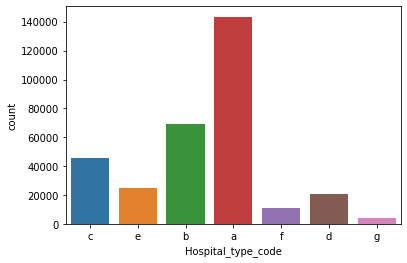

In [28]:
sns.countplot(data = train_data_raw1[cat] , x = 'Hospital_type_code')

#### Ta thấy

<AxesSubplot:xlabel='Hospital_type_code', ylabel='Stay'>

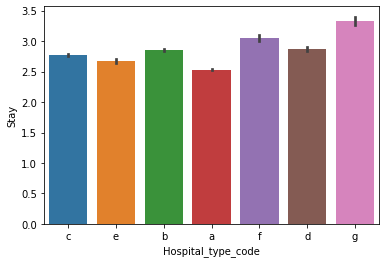

In [29]:
sns.barplot(x= "Hospital_type_code",y= "Stay", data = train_data_raw1)

#### Ta có biểu đồ

In [30]:
train_data_raw1[train_data_raw1['Hospital_type_code'] == 'a']

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,1
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,4
14,15,6,a,6,X,4,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,2685.0,0
15,16,6,a,6,X,3,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,9398.0,0
16,17,23,a,6,X,4,radiotherapy,Q,F,3.0,63418,8.0,Urgent,Extreme,4,71-80,2933.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318431,318432,23,a,6,X,3,anesthesia,Q,F,4.0,120672,2.0,Urgent,Extreme,2,71-80,4508.0,1
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,1


<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

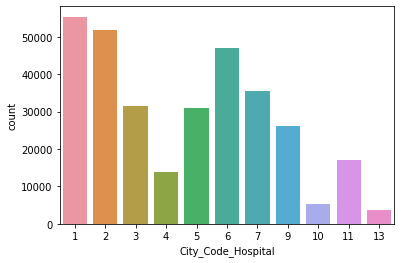

In [31]:
sns.countplot(data = train_data_raw1[cat] , x = 'City_Code_Hospital')

#### Ở đây ta thấy  tổng số

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='Stay'>

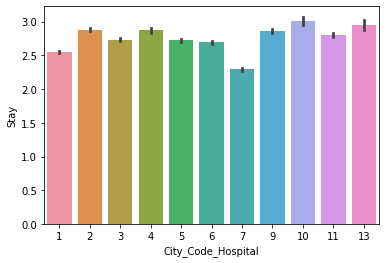

In [32]:
sns.barplot(x= "City_Code_Hospital",y= "Stay", data = train_data_raw1)

#### Biểu đồ cho ta thấy soos lượng lưu trứu ở các bệnh viện

<AxesSubplot:xlabel='Hospital_region_code', ylabel='count'>

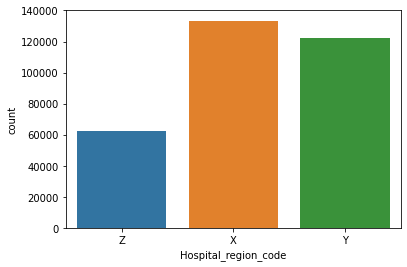

In [33]:
sns.countplot(data = train_data_raw1[cat] , x = 'Hospital_region_code')

#### Ta có 3 mã vùng

<AxesSubplot:xlabel='Hospital_region_code', ylabel='Stay'>

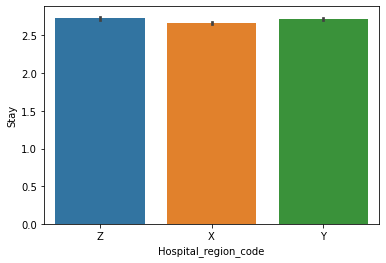

In [34]:
sns.barplot(x= "Hospital_region_code",y= "Stay", data = train_data_raw1)

#### Tỉ lệ lưu trú

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='count'>

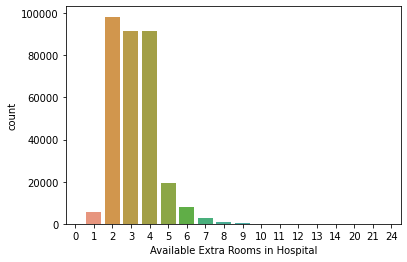

In [35]:
sns.countplot(data = train_data_raw1[cat] , x = 'Available Extra Rooms in Hospital')

#### Tỉ lệ lấp đầy các phòng ở các bệnh

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='Stay'>

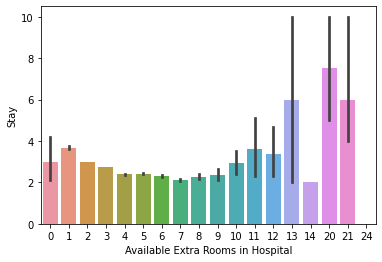

In [36]:
sns.barplot(x= "Available Extra Rooms in Hospital",y= "Stay", data = train_data_raw1)

#### tỷ lệ

(array([1.03908e+05, 1.83229e+05, 2.99500e+04, 1.24500e+03, 8.40000e+01,
        1.60000e+01, 0.00000e+00, 0.00000e+00, 5.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

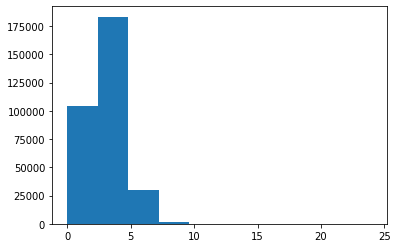

In [37]:
plt.hist(train_data_raw1['Available Extra Rooms in Hospital'])

#### Biểu đồ cho ta thấy

<AxesSubplot:xlabel='Department', ylabel='count'>

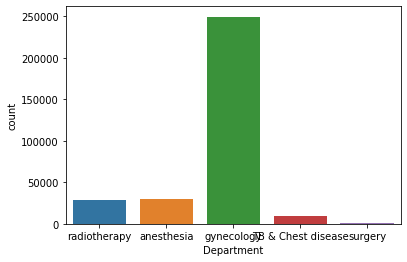

In [38]:
sns.countplot(data = train_data_raw1[cat] , x = 'Department')

#### Ta có

<AxesSubplot:xlabel='Department', ylabel='Stay'>

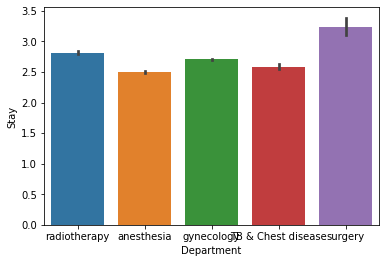

In [39]:
sns.barplot(x= "Department",y= "Stay", data = train_data_raw1)

#### ta có

<AxesSubplot:xlabel='Ward_Type', ylabel='count'>

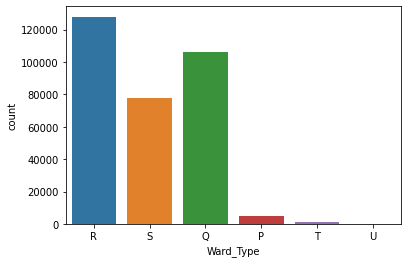

In [40]:
sns.countplot(data = train_data_raw1[cat] , x = 'Ward_Type')

#### Biểu đồ cho ta thấy được

<AxesSubplot:xlabel='Ward_Type', ylabel='Stay'>

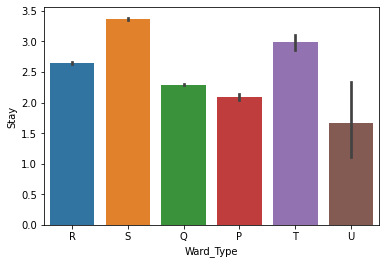

In [41]:
sns.barplot(x= "Ward_Type",y= "Stay", data = train_data_raw1)

#####  Ở biểu đồ này ta thấy

<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

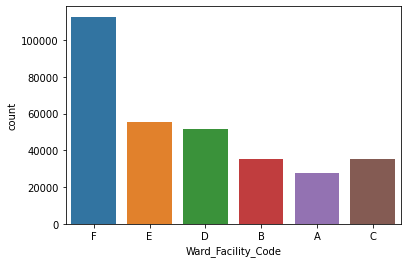

In [42]:
sns.countplot(data = train_data_raw1[cat] , x = 'Ward_Facility_Code')

#### Ta có

<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='Stay'>

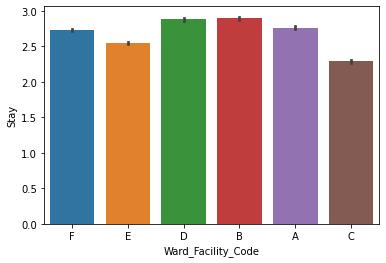

In [43]:
sns.barplot(x= "Ward_Facility_Code",y= "Stay", data = train_data_raw1)

#### ở đây ta thấy

<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='Stay'>

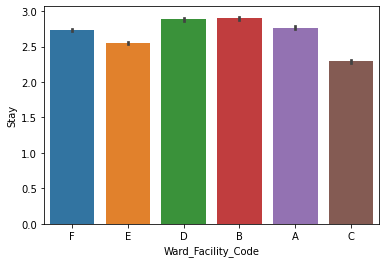

In [44]:
sns.barplot(x= "Ward_Facility_Code",y= "Stay", data = train_data_raw1)

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

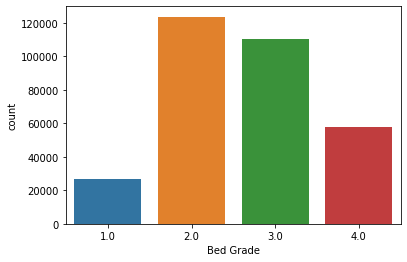

In [45]:
sns.countplot(data = train_data_raw1[cat] , x = 'Bed Grade')

<AxesSubplot:xlabel='Bed Grade', ylabel='Stay'>

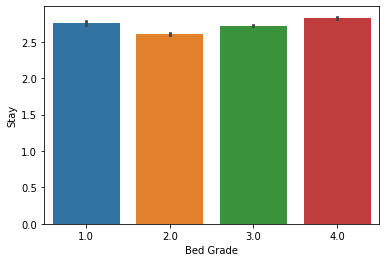

In [46]:
sns.barplot(x= "Bed Grade",y= "Stay", data = train_data_raw1)

#### Qua 2 biểu đồ trên

<AxesSubplot:xlabel='City_Code_Patient', ylabel='count'>

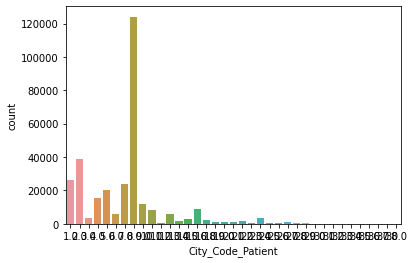

In [47]:
sns.countplot(data = train_data_raw1[cat] , x = 'City_Code_Patient')

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Stay'>

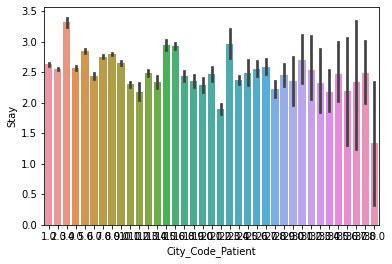

In [48]:
sns.barplot(x= "City_Code_Patient",y= "Stay", data = train_data_raw1)

#### 2 biểu đồ trên cho ta thấy

(array([8.43980e+04, 1.73902e+05, 2.62740e+04, 1.35020e+04, 4.68600e+03,
        7.11400e+03, 2.18100e+03, 1.52300e+03, 2.35000e+02, 9.10000e+01]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

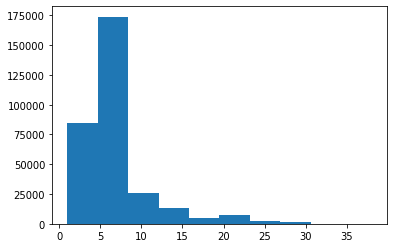

In [49]:
plt.hist(train_data_raw1.City_Code_Patient)

#### ...

<AxesSubplot:xlabel='Type of Admission', ylabel='count'>

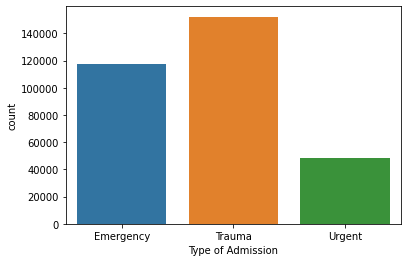

In [50]:
sns.countplot(data = train_data_raw1[cat] , x = 'Type of Admission')

<AxesSubplot:xlabel='Type of Admission', ylabel='Stay'>

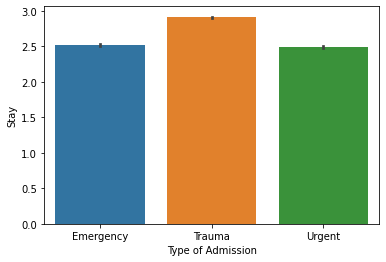

In [51]:
sns.barplot(x= "Type of Admission",y= "Stay", data = train_data_raw1)

#### ...

<AxesSubplot:xlabel='Severity of Illness', ylabel='count'>

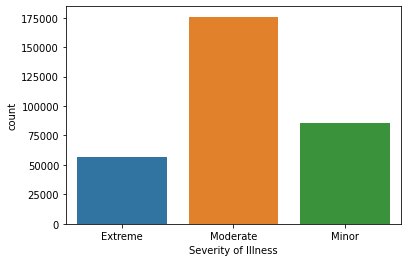

In [52]:
sns.countplot(data = train_data_raw1[cat] , x = 'Severity of Illness')

<AxesSubplot:xlabel='Severity of Illness', ylabel='Stay'>

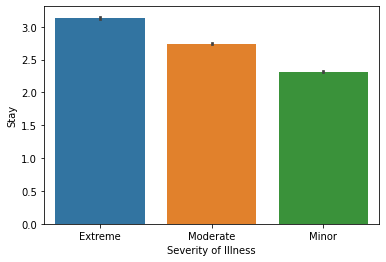

In [53]:
sns.barplot(x= "Severity of Illness",y= "Stay", data = train_data_raw1)

#### ...

<AxesSubplot:xlabel='Visitors with Patient', ylabel='count'>

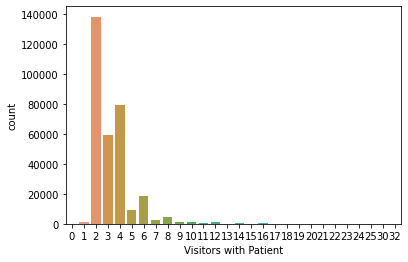

In [54]:
sns.countplot(data = train_data_raw1[cat] , x = 'Visitors with Patient')

<AxesSubplot:xlabel='Visitors with Patient', ylabel='Stay'>

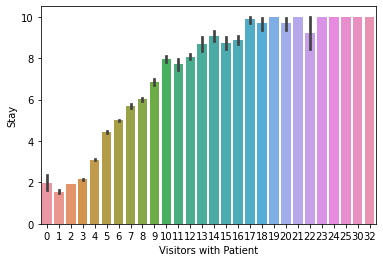

In [55]:
sns.barplot(x= "Visitors with Patient",y= "Stay", data = train_data_raw1)

####  ...

(array([1.98826e+05, 1.07304e+05, 8.73400e+03, 2.47800e+03, 5.07000e+02,
        3.79000e+02, 9.20000e+01, 1.00000e+02, 0.00000e+00, 1.80000e+01]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

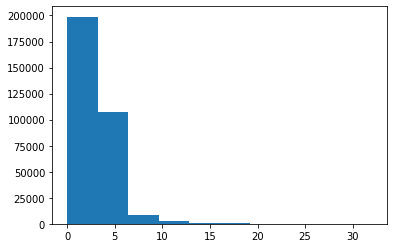

In [56]:
plt.hist(train_data_raw1['Visitors with Patient'])

<AxesSubplot:xlabel='Age', ylabel='count'>

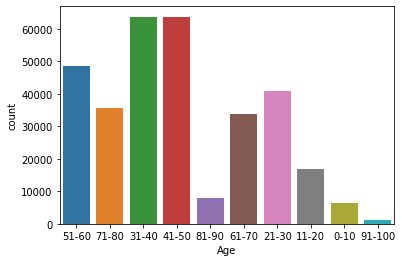

In [57]:
sns.countplot(data = train_data_raw1[cat] , x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Stay'>

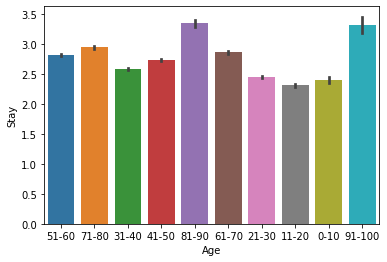

In [58]:
sns.barplot(x= "Age",y= "Stay", data = train_data_raw1)

#### ...

0.8511194351593763

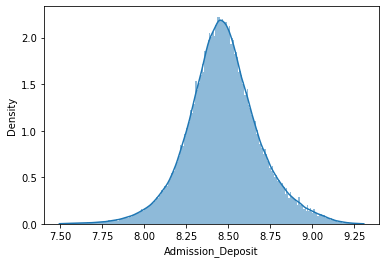

In [59]:
#sns.countplot(data = train_data_raw1[cat] , x = 'Admission_Deposit')
sns.histplot(np.log(train_data_raw1.Admission_Deposit),kde=True, stat="density", linewidth=0)
import scipy
scipy.stats.skew(np.log(train_data_raw1.Admission_Deposit))
scipy.stats.kurtosis(np.log(train_data_raw1.Admission_Deposit))

#### ...

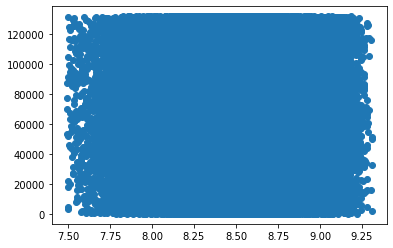

In [60]:
plt.scatter(np.log(train_data_raw1.Admission_Deposit),train_data_raw1.patientid)

(array([  2975.,  26059., 103190., 112815.,  45913.,  16963.,   6939.,
          2729.,    726.,    129.]),
 array([ 1800. ,  2720.8,  3641.6,  4562.4,  5483.2,  6404. ,  7324.8,
         8245.6,  9166.4, 10087.2, 11008. ]),
 <BarContainer object of 10 artists>)

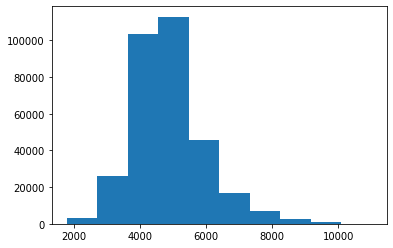

In [61]:
plt.hist(train_data_raw1.Admission_Deposit)

#### ...

<AxesSubplot:xlabel='Stay', ylabel='count'>

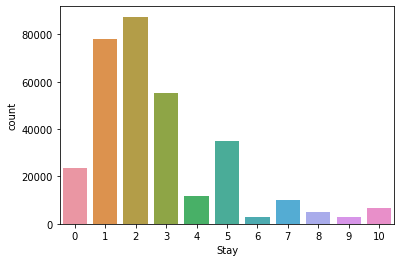

In [62]:
sns.countplot(data = train_data_raw1[cat] , x = 'Stay')

In [63]:
train_data_raw1.corr()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013702,-0.004150,0.065196,0.001309,-0.045972,-0.053882
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013739,0.002291,-0.015530,-0.028500,0.045446,0.042846
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049309,0.000750,-0.023988,0.018184,-0.034455,0.006381
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115868,0.000921,-0.009681,0.096714,-0.143739,-0.121120
Bed Grade,0.013702,-0.013739,-0.049309,-0.115868,1.000000,0.001645,-0.008105,0.088945,0.073833,0.025741
patientid,-0.004150,0.002291,0.000750,0.000921,0.001645,1.000000,0.002002,0.006889,-0.000877,0.001125
City_Code_Patient,0.065196,-0.015530,-0.023988,-0.009681,-0.008105,0.002002,1.000000,-0.012074,0.025837,-0.009704
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088945,0.006889,-0.012074,1.000000,-0.150358,0.537537
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073833,-0.000877,0.025837,-0.150358,1.000000,-0.052077
Stay,-0.053882,0.042846,0.006381,-0.121120,0.025741,0.001125,-0.009704,0.537537,-0.052077,1.000000


<AxesSubplot:>

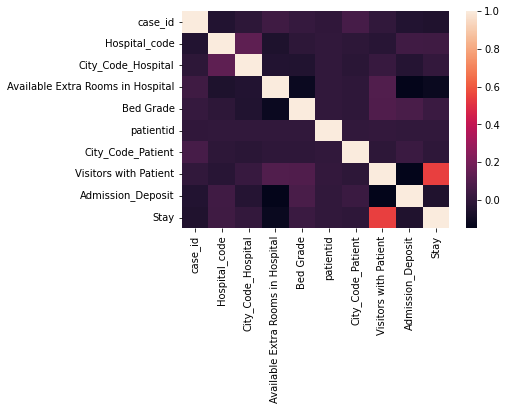

In [64]:
sns.heatmap(train_data_raw1.corr())

#### ...

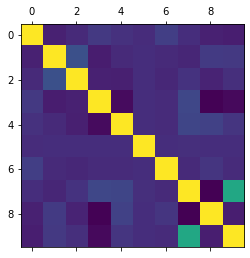

In [65]:
plt.matshow(train_data_raw1.corr())

In [66]:
from sklearn import preprocessing
col = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       ]
lb = preprocessing.LabelEncoder()
for i in col:
    train_data_raw1[i] = lb.fit(pd.concat([train_data_raw1[i],test_raw[i]]))
    test_raw[i] = lb.transform(test_raw[i])

In [67]:
test_raw.to_csv("Label_Encoded_Test.csv",index=False)

In [68]:
train_data_raw1

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),31397,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),4911.0,0
1,2,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),31397,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),5954.0,4
2,3,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),31397,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),4745.0,3
3,4,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),31397,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),7272.0,4
4,5,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),31397,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),86499,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),4144.0,1
318434,318435,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),325,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),6699.0,3
318435,318436,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),125235,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),4235.0,1
318436,318437,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),91081,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),3761.0,1


In [69]:
#train_data_raw1.to_csv("Label_Encoded_Train.csv")
train_data_raw1.corr()

,case_id,patientid,Admission_Deposit,Stay
case_id,1.000000,-0.004150,-0.045972,-0.053882
patientid,-0.004150,1.000000,-0.000877,0.001125
Admission_Deposit,-0.045972,-0.000877,1.000000,-0.052077
Stay,-0.053882,0.001125,-0.052077,1.000000


<AxesSubplot:>

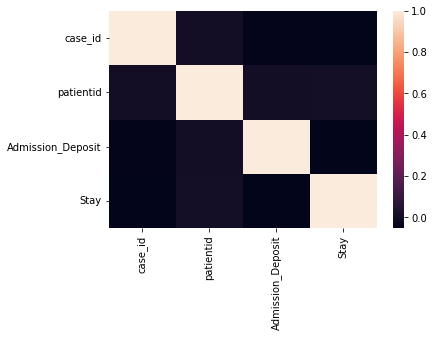

In [70]:
sns.heatmap(train_data_raw1.corr())

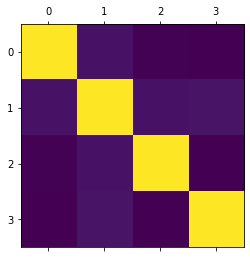

In [71]:
plt.matshow(train_data_raw1.corr())

In [1]:
from sklearn import linear_model
from xgboost import XGBClassifier
xg = XGBClassifier()
lr = linear_model.LinearRegression()
xg.fit(train_data_raw1[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit']][:200000],train_data_raw1['Stay'][:200000])
xg.score(train_data_raw1[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit']][:200000],train_data_raw1['Stay'][:200000])

NameError: name 'train_data_raw1' is not defined

In [ ]:
xg.score(train_data_raw1[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit']][200000:],train_data_raw1['Stay'][200000:])

In [ ]:
train_data_raw1.columns

In [ ]:
train_data_raw1.City_Code_Patient.unique()

In [ ]:
pd.plotting.scatter_matrix(train_data_raw1,figsize=(20,40))

In [ ]:
train_data_raw1.mean().sort_index().plot(style = ".")